In [1]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

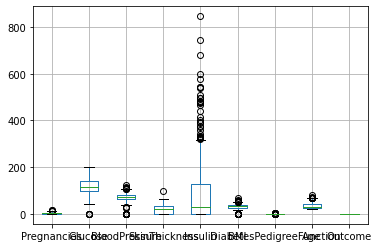

In [7]:
df.boxplot(figsize=(13,5))

<AxesSubplot:>

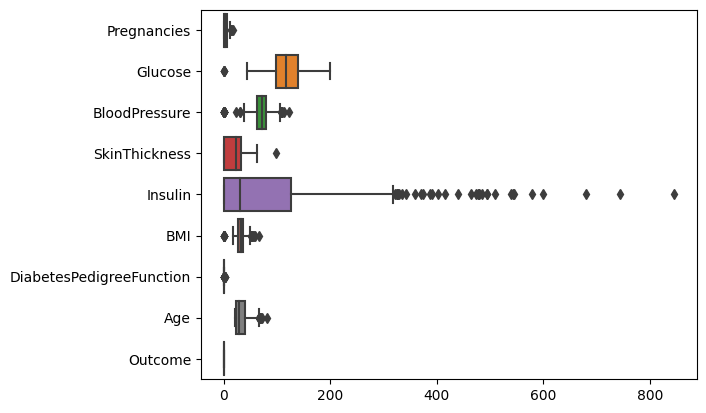

In [8]:

sns.boxplot(data=df,orient='h')


<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

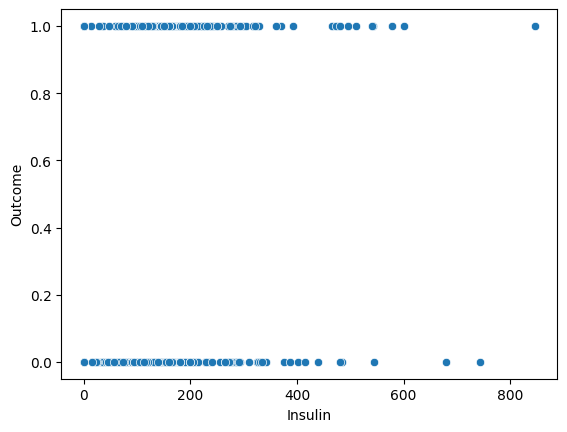

In [9]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])


In [10]:
X=df.drop('Outcome',axis = 1 )

In [11]:
Y= df['Outcome']

c:\Users\pokar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

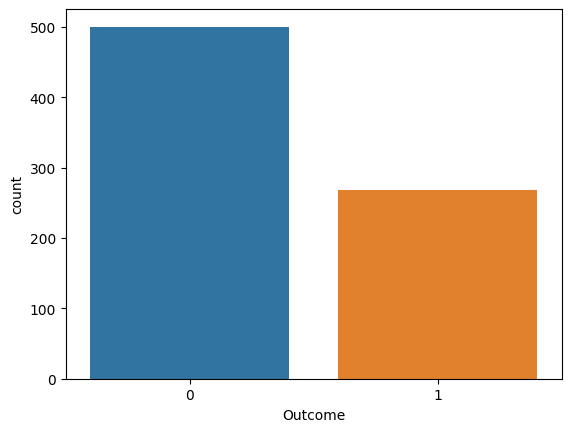

In [12]:
sns.countplot(Y)

In [13]:
from sklearn.ensemble import VotingClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import classification_report

In [16]:
m1=KNeighborsClassifier()
m2=LogisticRegression()
m3=DecisionTreeClassifier()
m4=MLPClassifier()
m5=svm.SVC(kernel='linear')

In [17]:
model = VotingClassifier([('knn',m1),('lr',m2),('dt',m3),('mlp',m4),('svc',m5)])

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [19]:
model.fit(X_train,Y_train)

c:\Users\pokar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('mlp', MLPClassifier()),
                             ('svc', SVC(kernel='linear'))])

In [20]:
Y_pred = model.predict(X_test)

<AxesSubplot:ylabel='Count'>

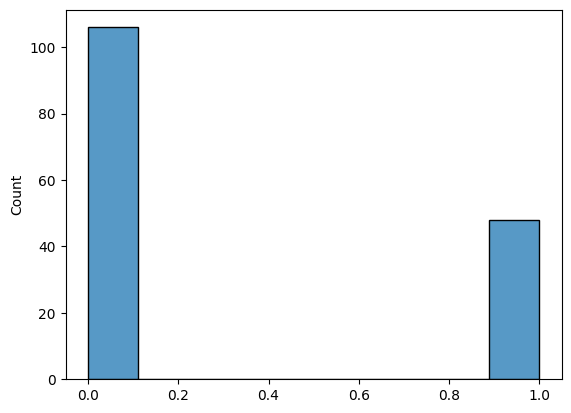

In [21]:
sns.histplot(Y_pred)

In [22]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       106
           1       0.57      0.65      0.61        48

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.75      0.74      0.74       154



In [24]:
model.save("final_model.sav")

AttributeError: 'VotingClassifier' object has no attribute 'save'